<a href="https://colab.research.google.com/github/SirCarlitros/Math2/blob/main/REGRESION_LINEAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión Lineal.
Autor: Jośe Falcón


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


La regresión lineal es un modelo matemático que consiste en encontrar la **ecuación lineal** que mejor se ajuste o aproxime a un conjunto de datos dado. Dicho de otra manera, se busca aproximar la relación de dependencia entre una variable dependiente $Y$ y variables independientes $x_i$ de la siguiente forma:

$$Y=\sum_{i=0}^d \hat{\beta}_{i}x_i$$

en donde a los $\hat{\beta}_i$ se les conoce como **estimadores o pesos**. Vamos a considerar a $x_0=1$

Cuando nos referimos a la que mejor **aproxime** es en el sentido de aquella ecuación lineal que minimice una función llamada **función de error o de costo**, por lo que la regresión lineal se convierte en un problema de minimización


<div style="text-align: center"><img src="https://economipedia.com/wp-content/uploads/Regresi%C3%B3n-lineal.png"></div>

Durante este notebook vamos a deducir la ecuación
$$\hat{\beta} = (X^TX)^{-1}X^TY$$
en donde $X$ es el conjunto de datos, $Y$ la variable dependiente, y $\hat{\beta}$ es el vector de estimadores o de pesos

Definición 1: Sea $w \in \mathbb{R}^n$ y $x \in \mathbb{R}^m$, definimos la derivada de x con respecto a w como:
$$\frac{dx}{dw} = \begin{pmatrix}
\frac{\partial x_1}{\partial w_1} & \dots & \frac{\partial x_1}{\partial w_n}\\
\vdots & \ddots & \vdots\\
\frac{\partial x_m}{\partial w_1} & \dots & \frac{\partial x_m}{\partial w_n}
\end{pmatrix}
$$
es decir $\left(\frac{dx}{dw}\right)_{ij}= \frac{\partial x_i}{\partial w_j}$

Proposición 1: Sea $A \in M_{nxm}(\mathbb{R})$ y $w \in \mathbb{R}^m$ (o equivalentemente $w \in M_{mx1}(\mathbb{R})$). Si las entradas de $A$ no dependen de las entradas de $w$ entonces:
$$\frac{d(Aw)}{dw} = A$$
Demostración:
$$(Aw)_i = \sum_{k = 1}^n A_{ik}w_k$$
$$\implies \left(\frac{d(Aw)}{dw}\right)_{ij} = \frac{\partial (Aw)_i}{\partial w_j} = \frac{\partial \left(\sum_{k = 1}^n A_{ik}w_k\right)}{\partial w_j} = \sum_{k = 1}^n \frac{\partial(A_{ik}w_k)}{\partial w_j} = \sum_{k = 1}^n A_{ik}\frac{\partial w_k}{\partial w_j} = \sum_{k = 1}^n A_{ik}\delta_{kj} = A_{ij}$$

Por lo tanto $$ \left(\frac{d(Aw)}{dw}\right)_{ij} = A_{ij}$$
y se concluye que:
$$\frac{d(Aw)}{dw} = A$$

Para la regresión lineal vamos a utilizar la función RSS, la cual es:

$$RSS = \sum_{i = 1}^n (y_i - \hat{y}_i)^2$$

Esta función se conoce normalmente como la "función de costo", "loss function" o "función de error". Nos da la suma del error cuadrático para cada una de las predicciones.
Esta sería una función que depende de los estimadores $\hat{\beta_i}$ o el vector de estimadores $\hat{\beta}$.

Sea $X \in M_{nxp}\left(\mathbb{R}\right)$ el conjunto de datos y $\hat{\beta} \in M_{px1}\left(\mathbb{R}\right)$ el vector de estimadores, entonces
$$\hat{y} = X\hat{\beta}$$
Podemos reescribir a RSS en forma matricial como:
$$RSS = \sum_{i = 1}^n (y_i - \hat{y}_i)^2 = (y-\hat{y})^T(y-\hat{y})$$


![](https://iartificial.net/wp-content/uploads/2018/12/error-regresion-lineal2.png)

Lo que queremos hacer es obtener los estimadores o pesos que minimicen dicha función de error.

$$(AB)^T=B^TA^T$$

Proposición 2: El vector de estimadores que minimiza a RSS es:
$$\hat{\beta} = \left(X^TX\right)^{-1}X^Ty$$

Demostración:
$$RSS = (y-\hat{y})^T(y-\hat{y}) = y^Ty-y^T\hat{y}-\hat{y}^Ty+\hat{y}^T\hat{y} = y^Ty-y^TX\hat{\beta}-\hat{\beta}^TX^Ty+\hat{\beta}^TX^TX\hat{\beta}$$

Derivamos la expresión anterior con respecto a $\hat{\beta}$ e igualamos la derivada a 0 para encontrar el vector de estimadores que minimiza el error RSS:
$$\frac{dRSS}{d\hat{\beta}} \stackrel{Proposición 1}{=} -y^TX + \hat{\beta}^TX^TX=0$$
$$\implies y^TX=\hat{\beta}^TX^TX$$
$$\implies X^TX\hat{\beta}=X^Ty$$
$$\implies \hat{\beta} = (X^TX)^{-1}X^Ty$$

# Problema 1

Tenemos un conjunto de datos que nos dice el salario dado el número de años de experiencia en una empresa.

## a) 
Realiza una gráfica de y= SALARIO versus x= AÑOS DE EXPERIENCIA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv("/content/drive/MyDrive/Salary_Data.csv")

In [7]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
x = dataset["YearsExperience"].values

y = dataset["Salary"].values

In [10]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

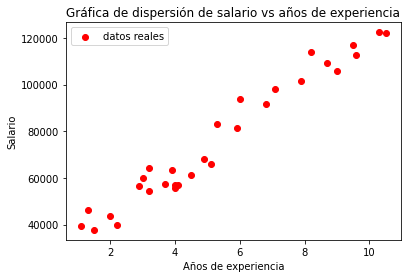

In [11]:
plt.scatter(x,y,color="red", label = "datos reales")
plt.title("Gráfica de dispersión de salario vs años de experiencia")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.legend()
plt.show()

## b)
Encuentra los estimadores por mínimos cuadrados $\widehat\beta_0$ y $\widehat\beta_1$.

In [17]:
x_ones = np.ones((x.shape[0],1))
x = x.reshape(-1,1)

In [18]:
x.shape

(30, 1)

In [19]:
X = np.concatenate((x_ones,x), axis = 1) 

In [20]:
X.shape

(30, 2)

In [21]:
y = y.reshape(-1,1)

In [22]:
y.shape

(30, 1)

In [23]:
def regresion_lineal(X,y):
    aux1 = np.matmul(X.T,X)
    aux2 = np.linalg.inv(aux1)
    aux3 = np.matmul(aux2,X.T)
    aux4 = np.matmul(aux3,y)
    return aux4

In [24]:
estimadores_1 = regresion_lineal(X,y)

In [25]:
estimadores_1

array([[25792.20019867],
       [ 9449.96232146]])

## c)
Haz la gráfica de la curva de ajuste $\widehat y=\widehat\beta_0+\widehat\beta_1x$


In [26]:
predicciones = np.matmul(X,estimadores_1)


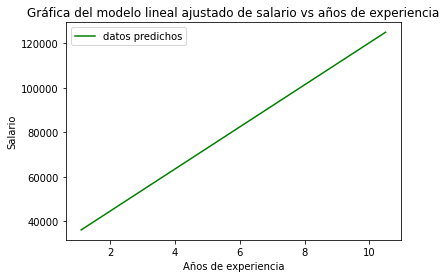

In [27]:
plt.plot(x,predicciones,color="green", label = "datos predichos")
plt.title("Gráfica del modelo lineal ajustado de salario vs años de experiencia")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.legend()
plt.show()

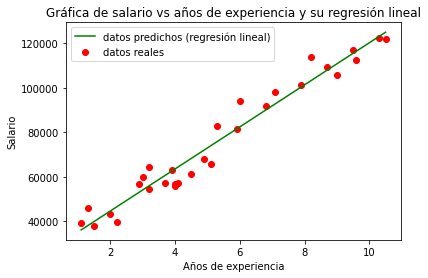

In [28]:
plt.scatter(x,y,color="red", label = "datos reales")
plt.plot(x,predicciones,color="green", label = "datos predichos (regresión lineal)")
plt.title("Gráfica de salario vs años de experiencia y su regresión lineal")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.legend()
plt.show()

# Problema 2

El banco internacional UBS produce regularmente un informe (UBS, 2009) sobre los precios y las ganancias en las principales ciudades del mundo. Tres de las medidas que incluyen son los precios de los productos básicos, a saber, 1 kg de arroz, una barra de pan de 1 kg y el precio de una hamburguesa Big Mac en McDonalds. Una característica interesante de los precios que informan es que los precios se miden en los minutos de trabajo necesarios para que un trabajador "típico" en ese lugar gane suficiente dinero para comprar el producto. El uso de minutos de trabajo corrige al menos en parte las fluctuaciones monetarias, las tasas salariales vigentes y los precios locales. El archivo de datos incluye mediciones de precios de arroz, pan y Big Mac de los informes de 2003 y 2009. El año 2003 fue antes de que la gran recesión golpeara a gran parte del mundo alrededor de 2006, y el año 2009 puede reflejar cambios en los precios debido a la recesión.

# a) 
Realiza un gráfico de dispersión de y = rice2009 versus x = rice2003, los precios del
arroz en 2009 y en 2003, respectivamente.


In [ ]:
dataset2 = pd.read_csv("UBSprices.csv")

In [ ]:
dataset2.head()

In [ ]:
x_2 = dataset2["rice2003"].values
x_2

In [ ]:
y_2 = dataset2["rice2009"].values
y_2

In [ ]:
plt.scatter(x_2,y_2,color="red", label = "datos reales arroz2009 vs arroz2003")
plt.title("Gráfica de dispersión del precio del arroz2009 vs precio del arroz2003")
plt.xlabel("Precio del arroz en 2003")
plt.ylabel("Precio del arroz en 2009")
plt.legend()
plt.show()

# b)
Encuentra los estimadores por mínimos cuadrados $\widehat\beta_0$ y $\widehat\beta_1$. 

# c)

Haz la gráfica de la curva de ajuste $\widehat y=\widehat\beta_0+\widehat\beta_1x$


# d)
Realiza nuevamente un gráfico de dispersión pero usando escalas logarítmicas, es decir, realiza el gráfico de dispersión de $y=\log(\mathtt{rice2009})$ versus $x=\log(\mathtt{rice2003})$.

# e)
Repite los incisos (b) y (c) pero con este representación alternativa en escalas logarítmicas.

# f) Regresando a la expresión original.
En la parte anterior, se realizó una regresión lineal para las variables $ln(y) = \beta_{0} + \beta_1ln(x)$, esto implica que:
$$y = e^{\beta_{0} + \beta_1ln(x)} = e^{\beta_{0} + ln\left(x^{\beta_1}\right)} = e^{\beta_0}e^{ln\left(x^{\beta_1}\right)} = e^{\beta_0}x^{\beta_1}$$
entonces, la función que se ajustó es:
$$y = e^{\beta_0}x^{\beta_1}$$

A continuación la vamos a graficar, junto con los datos originales, para ver como es el modelo.

## Problema 3.

El Estudio de orientación de Berkeley  inscribió a niños nacidos en Berkeley, California, entre enero de 1928 y junio de 1929, y luego los midió periódicamente hasta los 18 años (Tuddenham y Snyder, 1954). Los datos que utilizamos incluyen alturas en centímetros a las edades de 2, 9 y 18 años ($\mathtt{HT2}$, $\mathtt{HT9}$ y $\mathtt{HT18}$), pesos en kilogramos ($\mathtt{WT2}$, $\mathtt{WT9}$ y $\mathtt{WT18}$), circunferencia de la pierna en centímetros ($\mathtt{LG2}$, $\mathtt{LG9}$ y $\mathtt{LG18}$) y fuerza en kilogramo ($\mathtt{ST2}$, $\mathtt{ST9}$ y $\mathtt{ST18}$). También se proporcionan dos medidas adicionales del tipo de cuerpo, $\mathtt{soma}$, somatotipo, una escala de 1, muy delgada, a 7, obesidad e índice de masa corporal, calculada como $\mathtt{IMC18}=\mathtt{WT18} / (\mathtt{HT18} / 100)^2$, peso en kilogramo dividido por el cuadrado de masa en metros, una medida estándar de la obesidad. 

## a)
Haga la matriz de diagramas de dispersión de $\mathtt{HT2}$, $\mathtt{HT9}$, $\mathtt{WT2}$, $\mathtt{WT9}$, $\mathtt{ST9}$, y $\mathtt{BMI18}$.

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset_4, alpha = 0.5, figsize=(15,15), c = "red", grid = True)

NameError: ignored

## b)
Ajuste el modelo de regresión lineal por mínimos cuadrados para la variable $y=\mathtt{BMI18}$ versus $x_1=\mathtt{HT2}$, $x_2=\mathtt{WT2}$, $x_3=\mathtt{HT9}$, $x_4=\mathtt{WT9}$ y $x_5=\mathtt{ST9}$.

## Regresión polinomial.
Veamos un ejemplo de como aplicar el algoritmo de regresión lineal para poder hacer una regresión polinomial. En este caso, se transforman las variables a las potencias deseadas del polinomio por lo que cada estimador o peso $\hat{\beta}_i$ es el coeficiente que multiplica a una cierta potencia de la variable de nuestro polinomio.
